In [14]:
import tensorflow as tf
import numpy as np
from os import listdir
import imageio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pcaTo2D(imgs):
    imgs = np.reshape(imgs, (-1, 30*30))
    pca = PCA(n_components=2)
    imgs = pca.fit_transform(imgs)
    return imgs
def displayImage(img):
    plt.imshow(img, cmap='gray', vmin=0,vmax=255)
    plt.show()
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    path+='/' if path[-1] != '/' else '' 
    for image in imagesList:
        img = imageio.imread(path + image)
        loadedImages.append(img)
    return loadedImages

# load one directory's BMP files to np array imgs
imgs_1 = np.array(loadImages('./Data_Train/Class1/'))
imgs_2 = np.array(loadImages('./Data_Train/Class2/'))
imgs_3 = np.array(loadImages('./Data_Train/Class3/'))
imgs = np.append(imgs_1, imgs_2, axis=0)
imgs = np.append(imgs, imgs_3, axis=0)
# pca 30*30 images to 2 principle components
pca_imgs = pcaTo2D(imgs)
# append the x0 to head of the matrix([x00, x01, x02], [x10, x11, x12].....)
X0 = np.full((pca_imgs.shape[0], 1), 1)
pca_imgs = np.append(X0, pca_imgs, axis=1)


# Create the model
x = tf.placeholder(tf.float32, [None, 3])
# Layer 1
W1 = tf.Variable(tf.truncated_normal([3, 6], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1, shape=[6]))
Y1 = tf.nn.sigmoid(tf.matmul(x, W1) + B1)
# Layer 2 
W2 = tf.Variable(tf.truncated_normal([6, 3], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, shape=[3]))
Y2 = (tf.matmul(Y1, W2) + B2)

y_ = tf.placeholder(tf.float32, [None, 3])
cross_entropy = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=Y2))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(600):
    xx, yy = (pca_imgs[i:i+1], np.array([[1,0,0]]))
    sess.run(train_step, feed_dict={x: xx, y_: yy})
    xx, yy = (pca_imgs[i+1000:i+1000+1], np.array([[0,1,0]]))
    sess.run(train_step, feed_dict={x: xx, y_: yy})
    xx, yy = (pca_imgs[i+2000:i+2000+1], np.array([[0,0,1]]))
    sess.run(train_step, feed_dict={x: xx, y_: yy})

    
output = tf.argmax(tf.nn.softmax(Y2), 1)
output2 = tf.nn.softmax(Y2)
t=0
f=0
for i in range(600, 1000):
    o = sess.run(output, feed_dict={x: pca_imgs[i:i+1],
                                                  y_: np.array([[1,0,0]])})
    if(o == 0):
        t+=1
    else:
        f+=1
    o = sess.run(output, feed_dict={x: pca_imgs[i+1000:i+1000+1],
                                                  y_: np.array([[0,1,0]])})
    if(o == 1):
        t+=1
    else:
        f+=1
    o = sess.run(output, feed_dict={x: pca_imgs[i+2000:i+2000+1],
                                                  y_: np.array([[0,0,1]])})
    if(o == 2):
        t+=1
    else:
        f+=1
print(t/(t+f))

0.7991666666666667


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
0.3677835587460466
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
0.40519715236390547
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
0.32797836490159404
(3000, 2)


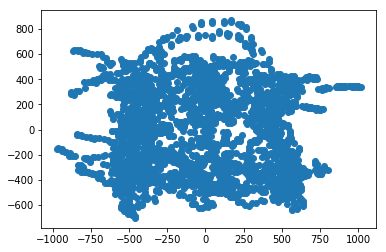

In [19]:
pca_imgs_1 = pcaTo2D(imgs_1)
pca_imgs_2 = pcaTo2D(imgs_2)
pca_imgs_3 = pcaTo2D(imgs_3)
imgs = np.append(pca_imgs_1, pca_imgs_2, axis=0)
imgs = np.append(imgs, pca_imgs_3, axis=0)
print(imgs.shape)
plt.scatter(imgs[:, 0], imgs[:, 1],marker='o')
plt.show()

In [20]:
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
X,y=oliv.data, oliv.target
pca_oliv = PCA(2)
X_proj = pca_oliv.fit_transform(X)
print(pca_oliv)
print(np.sum(pca_oliv.explained_variance_ratio_))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
0.37806723


In [9]:
import tensorflow as tf

ImportError: No module named tensorflow